# **Netflix Content Stratergy Analysis**

Data Exploration

In [43]:
!pip install -U kaleido


In [44]:
import pandas as pd
from IPython.display import Image, display

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default="plotly_white"

In [45]:
data=pd.read_csv("/content/netflix_content_2023.csv")
data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [46]:
data.tail()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
24807,We Are Black and British: Season 1,No,NaN,"1,00,000",English,Show
24808,Whitney Cummings: Can I Touch It?,Yes,2019-07-30,"1,00,000",English,Movie
24809,Whitney Cummings: Jokes,No,2022-07-26,"1,00,000",English,Movie
24810,"Whose Vote Counts, Explained: Limited Series",Yes,2020-09-28,"1,00,000",English,Movie
24811,Zach Galifianakis: Live at the Purple Onion,No,NaN,"1,00,000",English,Movie


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


**Viewership by Content type**

In [48]:
data['Hours Viewed']=data['Hours Viewed'].replace(',','',regex=True).astype(float)
data[['Title','Hours Viewed']].head()

,Title,Hours Viewed
0,The Night Agent: Season 1,812100000.0
1,Ginny & Georgia: Season 2,665100000.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0
3,Wednesday: Season 1,507700000.0
4,Queen Charlotte: A Bridgerton Story,503000000.0


In [49]:
content_type_viewership=data.groupby('Content Type')['Hours Viewed'].sum()

In [50]:
fig=go.Figure(data=[
    go.Bar(
        x=content_type_viewership.index,
        y=content_type_viewership.values,
        marker_color=['skyblue','salmon']
    )
])


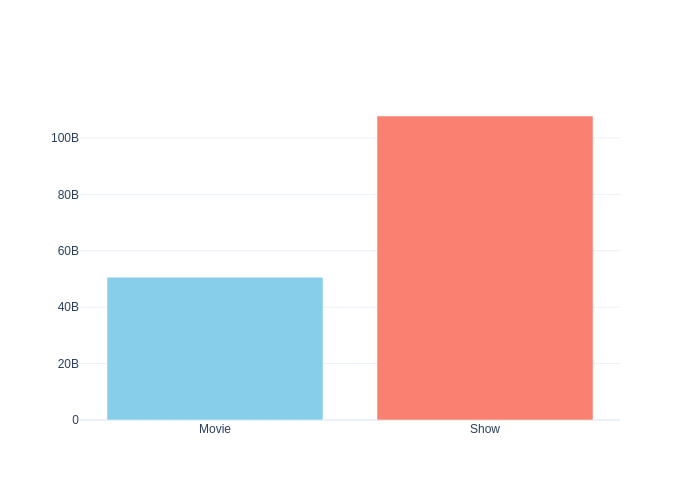

In [51]:
pio.write_image(fig, "plot.png")

# Display image (static) so it shows up on GitHub
display(Image(filename="plot.png"))

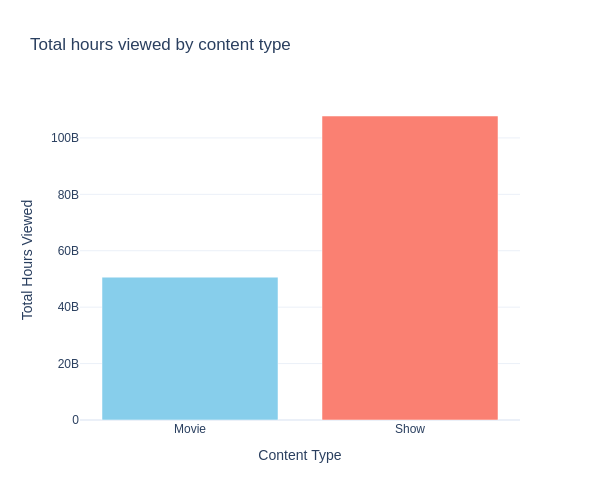

In [52]:
fig.update_layout(
    title="Total hours viewed by content type",
    height=500,
    width=600,
    xaxis_title="Content Type",
    yaxis_title="Total Hours Viewed"
    )

pio.write_image(fig, "plot2.png")

# Display image (static) so it shows up on GitHub
display(Image(filename="plot2.png"))

**Viewership by Language**

In [53]:
language_viewership=data.groupby('Language Indicator')['Hours Viewed'].sum()

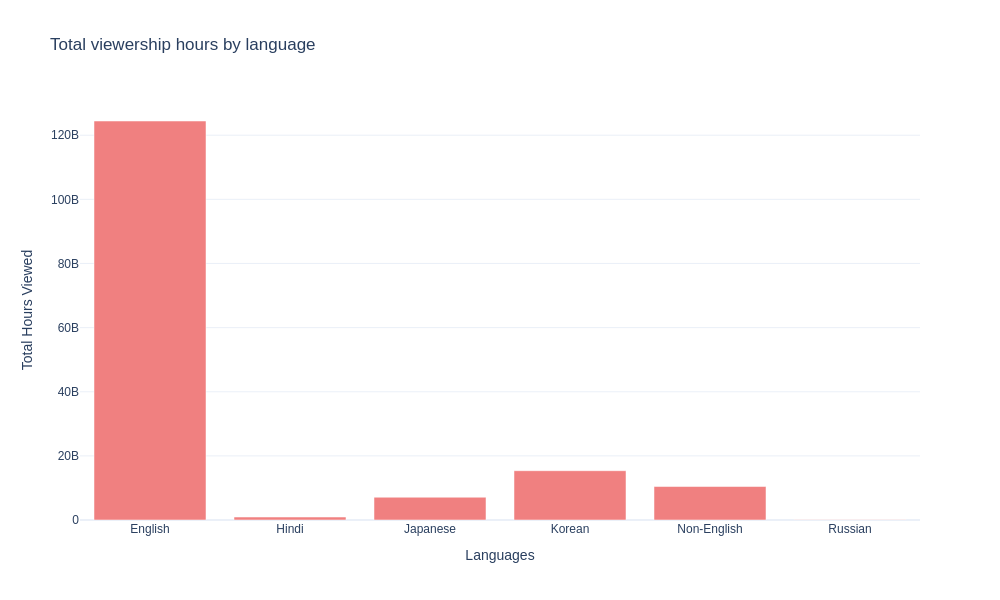

In [54]:
fig=go.Figure(data=[
    go.Bar(
    x=language_viewership.index,
    y=language_viewership.values,
    marker_color="lightcoral"
    )
])

fig.update_layout(
    title="Total viewership hours by language",
    xaxis_title="Languages",
    yaxis_title="Total Hours Viewed",
    height=600,
    width=1000
)
pio.write_image(fig, "plot3.png")

# Display image (static) so it shows up on GitHub
display(Image(filename="plot3.png"))

**Viewership by Release Month**

In [55]:
data["Release Date"]=pd.to_datetime(data["Release Date"])
data["Release Month"]=data["Release Date"].dt.month

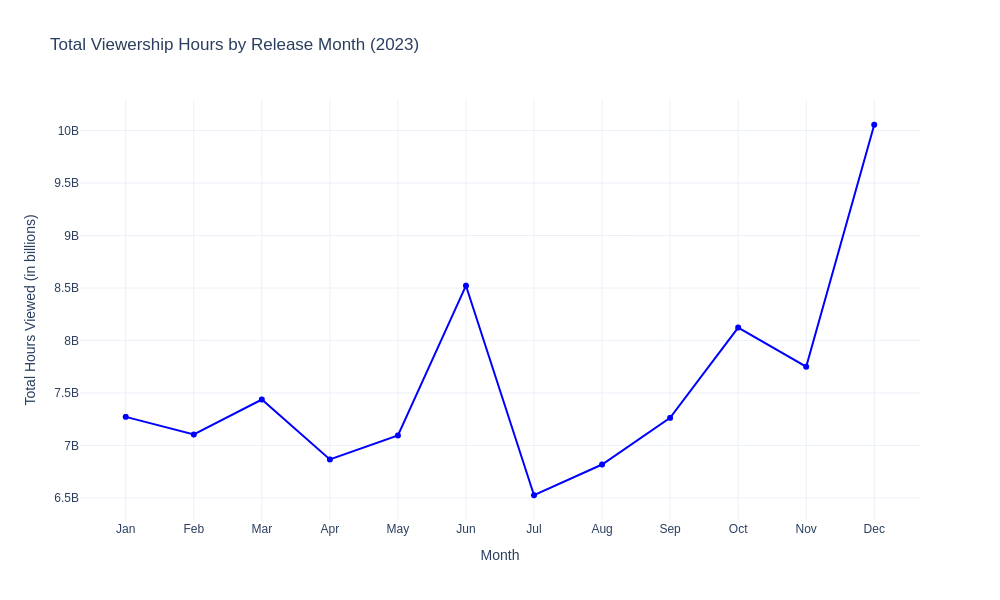

In [56]:
monthly_viewership=data.groupby("Release Month")["Hours Viewed"].sum()

fig=go.Figure(
    data=[
      go.Scatter(
          x=monthly_viewership.index,
          y=monthly_viewership.values,
          mode='lines+markers',
          marker=dict(color='blue'),
          line=dict(color='blue')
      )
    ]
)
fig.update_layout(
    title='Total Viewership Hours by Release Month (2023)',
    xaxis_title='Month',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    height=600,
    width=1000
)
pio.write_image(fig, "plot.png")

# Display image (static) so it shows up on GitHub
display(Image(filename="plot.png"))

In [57]:
top_5_titles=data.nlargest(5,"Hours Viewed")

top_5_titles[['Title','Hours Viewed','Language Indicator','Content Type','Release Date']]

,Title,Hours Viewed,Language Indicator,Content Type,Release Date
0,The Night Agent: Season 1,812100000.0,English,Show,2023-03-23
1,Ginny & Georgia: Season 2,665100000.0,English,Show,2023-01-05
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,630200000.0,Korean,Movie,2023-06-17
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0,Korean,Show,2022-12-30
18214,ONE PIECE: Season 1,541900000.0,English,Show,2023-08-31


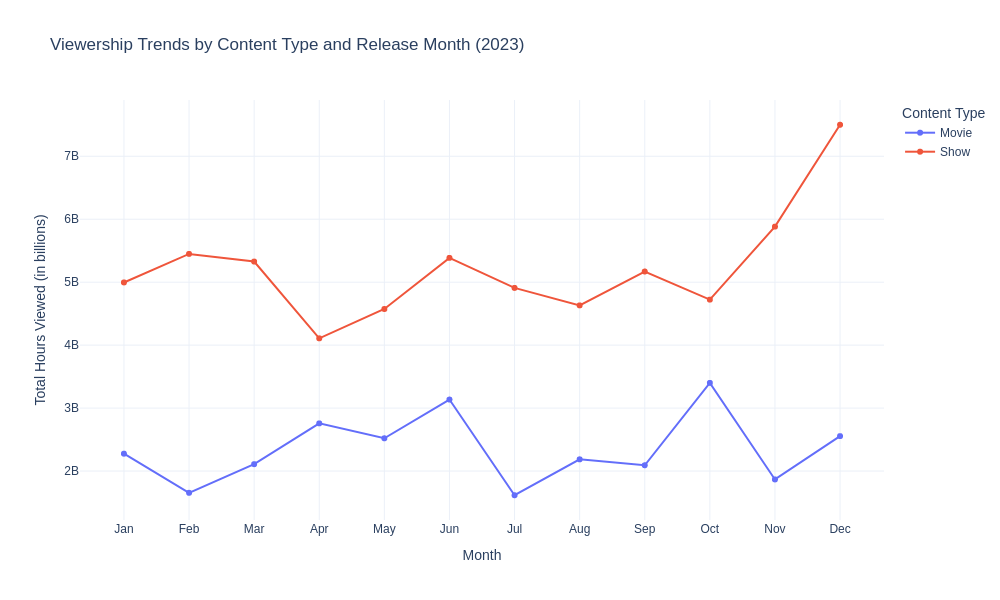

In [58]:
# aggregate viewership hours by content type and release month
monthly_viewership_by_type = data.pivot_table(index='Release Month',
                                                      columns='Content Type',
                                                      values='Hours Viewed',
                                                      aggfunc='sum')

fig = go.Figure()

for content_type in monthly_viewership_by_type.columns:
    fig.add_trace(
        go.Scatter(
            x=monthly_viewership_by_type.index,
            y=monthly_viewership_by_type[content_type],
            mode='lines+markers',
            name=content_type
        )
    )

fig.update_layout(
    title='Viewership Trends by Content Type and Release Month (2023)',
    xaxis_title='Month',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    height=600,
    width=1000,
    legend_title='Content Type'
)

pio.write_image(fig, "plot.png")

# Display image (static) so it shows up on GitHub
display(Image(filename="plot.png"))

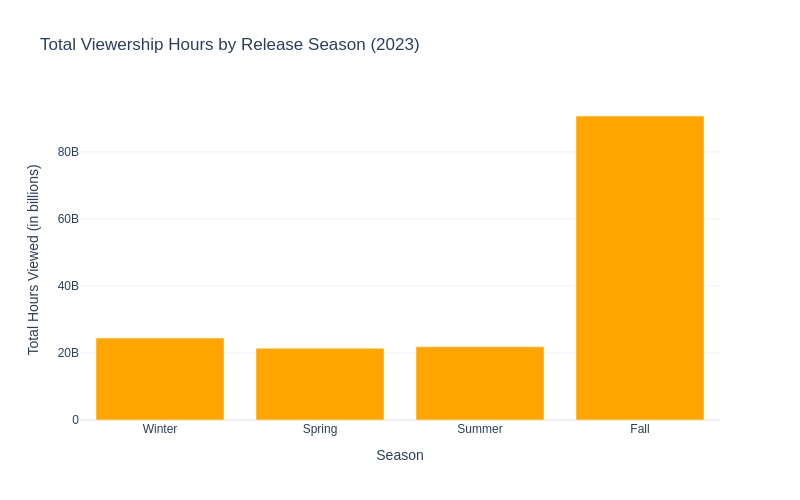

In [59]:

# define seasons based on release months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# apply the season categorization to the dataset
data['Release Season'] = data['Release Month'].apply(get_season)

# aggregate viewership hours by release season
seasonal_viewership = data.groupby('Release Season')['Hours Viewed'].sum()

# order the seasons as 'Winter', 'Spring', 'Summer', 'Fall'
seasons_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_viewership = seasonal_viewership.reindex(seasons_order)

fig = go.Figure(data=[
    go.Bar(
        x=seasonal_viewership.index,
        y=seasonal_viewership.values,
        marker_color='orange'
    )
])

fig.update_layout(
    title='Total Viewership Hours by Release Season (2023)',
    xaxis_title='Season',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis_tickangle=0,
    height=500,
    width=800,
    xaxis=dict(
        categoryorder='array',
        categoryarray=seasons_order
    )
)

pio.write_image(fig, "plot.png")

# Display image (static) so it shows up on GitHub
display(Image(filename="plot.png"))

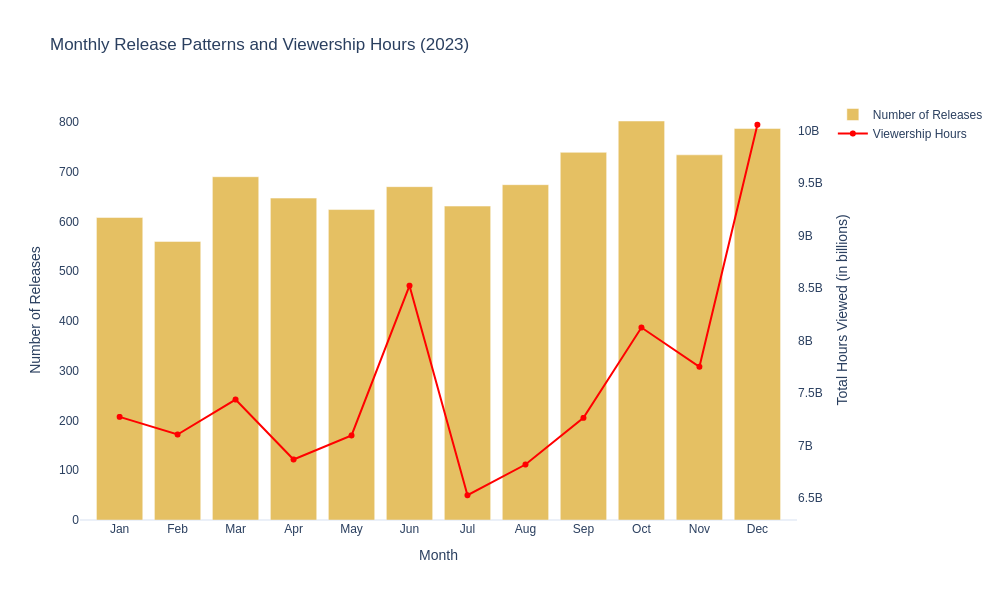

In [60]:
monthly_releases = data['Release Month'].value_counts().sort_index()

monthly_viewership = data.groupby('Release Month')['Hours Viewed'].sum()

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=monthly_releases.index,
        y=monthly_releases.values,
        name='Number of Releases',
        marker_color='goldenrod',
        opacity=0.7,
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=monthly_viewership.index,
        y=monthly_viewership.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y2'
    )
)

fig.update_layout(
    title='Monthly Release Patterns and Viewership Hours (2023)',
    xaxis=dict(
        title='Month',
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        x=1.05,
        y=1,
        orientation='v',
        xanchor='left'
    ),
    height=600,
    width=1000
)

pio.write_image(fig, "plot.png")

# Display image (static) so it shows up on GitHub
display(Image(filename="plot.png"))

**Viewership by Release Day**

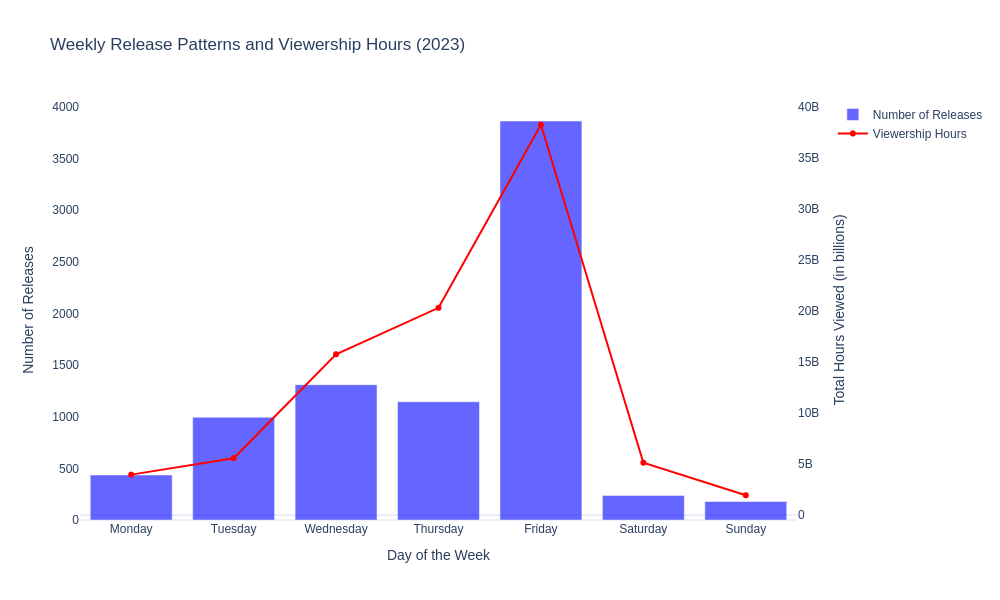

In [61]:
data['Release Day'] = data['Release Date'].dt.day_name()

weekday_releases = data['Release Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# aggregate viewership hours by day of the week
weekday_viewership = data.groupby('Release Day')['Hours Viewed'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=weekday_releases.index,
        y=weekday_releases.values,
        name='Number of Releases',
        marker_color='blue',
        opacity=0.6,
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=weekday_viewership.index,
        y=weekday_viewership.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y2'
    )
)

fig.update_layout(
    title='Weekly Release Patterns and Viewership Hours (2023)',
    xaxis=dict(
        title='Day of the Week',
        categoryorder='array',
        categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        x=1.05,
        y=1,
        orientation='v',
        xanchor='left'
    ),
    height=600,
    width=1000
)

pio.write_image(fig, "plot.png")

# Display image (static) so it shows up on GitHub
display(Image(filename="plot.png"))

Effect of significant holidays on Release Dates

In [62]:
# define significant holidays and events in 2023
important_dates = [
    '2023-01-01',  # new year's day
    '2023-02-14',  # valentine's ay
    '2023-07-04',  # independence day (US)
    '2023-10-31',  # halloween
    '2023-12-25'   # christmas day
]

# convert to datetime
important_dates = pd.to_datetime(important_dates)

# check for content releases close to these significant holidays (within a 3-day window)
holiday_releases = data[data['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in important_dates)
)]

# aggregate viewership hours for releases near significant holidays
holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()

holiday_releases[['Title', 'Release Date', 'Hours Viewed']]

,Title,Release Date,Hours Viewed
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000.0
6,La Reina del Sur: Season 3,2022-12-30,429600000.0
11,Kaleidoscope: Limited Series,2023-01-01,252500000.0
29,Perfect Match: Season 1,2023-02-14,176800000.0
124,Lady Voyeur: Limited Series // Olhar Indiscret...,2022-12-31,86000000.0
...,...,...,...
22324,The Romantics: Limited Series,2023-02-14,1000000.0
22327,Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5,2023-02-16,900000.0
22966,The Lying Life of Adults: Limited Series // La...,2023-01-04,900000.0
22985,Community Squad: Season 1 // División Palermo:...,2023-02-17,800000.0


**Conclusion**

The content strategy of Netflix revolves around maximizing viewership through targeted release timing and content variety. Shows consistently outperform movies in viewership, with significant spikes in December and June, indicating strategic releases around these periods. The Fall season stands out as the peak time for audience engagement. Most content is released on Fridays, which aims to capture viewers right before the weekend, and viewership aligns strongly with this release pattern. While the number of releases is steady throughout the year, viewership varies, which suggests a focus on high-impact titles and optimal release timing over sheer volume.